In [12]:
import numpy
import math
from matplotlib import pyplot
%matplotlib inline

In [13]:
N = 100
x_start, x_end = -1.0, 1.0
y_start, y_end = -1.5, 1.5
x = numpy.linspace(x_start, x_end, N)
y = numpy.linspace(y_start, y_end, N)
X, Y = numpy.meshgrid(x, y)

In [14]:
u_inf = 1.0

u_freestream = u_inf * numpy.ones((N, N), dtype=float)
v_freestream = numpy.zeros((N, N), dtype=float)

In [15]:
class Source:
    """
    Contains information related to a source/sink.
    """
    def __init__(self, strength, x, y):
        """
        Sets the location and strength of the singularity.
        
        Parameters
        ----------
        strength: float
            Strength of the source/sink.
        x: float
            x-coordinate of the source/sink.
        y: float
            y-coordinate of the source/sink.
        """
        self.strength = strength
        self.x, self.y = x, y

    def velocity(self, X, Y):
        """
        Computes the velocity field generated by the source/sink.
        
        Parameters
        ----------
        X: 2D Numpy array of floats
            x-coordinate of the mesh points.
        Y: 2D Numpy array of floats
            y-coordinate of the mesh points.
        """
        self.u = self.strength/(2*math.pi)*(X-self.x)/((X-self.x)**2+(Y-self.y)**2)
        self.v = self.strength/(2*math.pi)*(Y-self.y)/((X-self.x)**2+(Y-self.y)**2)

    def stream_function(self, X, Y):
        """
        Computes the stream-function generated by the source/sink.
        
        Parameters
        ----------
        X: 2D Numpy array of floats
            x-coordinate of the mesh points.
        Y: 2D Numpy array of floats
            y-coordinate of the mesh points.
        """
        self.psi = self.strength/(2*math.pi)*numpy.arctan2((Y-self.y), (X-self.x))

In [16]:
N_sources = 11
strength = 5.0
strength_source = strength/N_sources
x_source = numpy.zeros(N_sources, dtype=float)
y_source = numpy.linspace(-1.0, 1.0, N_sources)

sources = numpy.empty(N_sources, dtype=object)
for i in range(N_sources):
    sources[i] = Source(strength_source, x_source[i], y_source[i])
    sources[i].velocity(X, Y)

u = u_freestream.copy()
v = v_freestream.copy()
for source in sources:
    u += source.u
    v += source.v

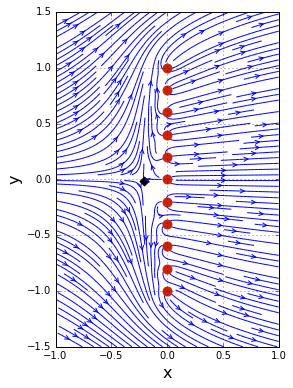

In [17]:
size = 4
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.grid()
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.streamplot(X, Y, u, v,
                  density=2, linewidth=1, arrowsize=1, arrowstyle='->')

pyplot.scatter(x_source, y_source,
               color='#CD2305', s=80, marker='o')

magnitude = numpy.sqrt(u**2 + v**2)
j_stagn, i_stagn = numpy.unravel_index(magnitude.argmin(), magnitude.shape)

pyplot.scatter(x[i_stagn], y[j_stagn],
               color='black', s=40, marker='D')
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end);

In [18]:
from scipy import integrate

In [19]:
a = 3.0
print(integrate.quad(lambda x, a: a * x**2, 0.0, 1.0, args=a))
b = 2.0
print(integrate.quad(lambda x, a, b: a * b * x**2, 0.0, 1.0, args=(a, b)))

(1.0, 1.1102230246251565e-14)
(2.0, 2.220446049250313e-14)


In [20]:
square = lambda x, a: a * x**2
x_min, x_max = -1.0, 1.0
def integration1(a, integrand):
    return integrate.quad(integrand, x_min, x_max, args=(a))[0]

vec_integration1 = numpy.vectorize(integration1)
vec_integration1(3,square)

array(2.0)

In [23]:
sigma = 2.5

y_min, y_max = -1.0, 1.0

integrand_u = lambda s, x, y: x / (x**2 + (y - s)**2)
integrand_v = lambda s, x, y: (y - s) / (x**2 + (y - s)**2)

def integration(x, y, integrand):
    return integrate.quad(integrand, y_min, y_max, args=(x, y))[0]

vec_integration = numpy.vectorize(integration)

u_sheet = sigma / (2.0 * numpy.pi) * vec_integration(X, Y, integrand_u)
v_sheet = sigma / (2.0 * numpy.pi) * vec_integration(X, Y, integrand_v)

u = u_freestream + u_sheet
v = v_freestream + v_sheet

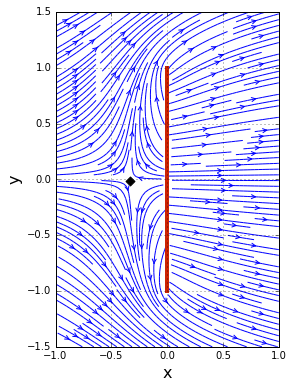

In [24]:
size = 4
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.grid()
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.streamplot(X, Y, u, v,
                  density=2, linewidth=1, arrowsize=1, arrowstyle='->')

pyplot.axvline(0.0,
               (y_min-y_start)/(y_end-y_start),
               (y_max-y_start)/(y_end-y_start),
               color='#CD2305', linewidth=4)

magnitude = numpy.sqrt(u**2 + v**2)
j_stagn, i_stagn = numpy.unravel_index(magnitude.argmin(), magnitude.shape)

pyplot.scatter(x[i_stagn], y[j_stagn],
               color='black', s=40, marker='D')
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end);